# Ścieżki do plików

TRAIN_TEXTS_PATH = "C:\\Users\\Maciej\\Desktop\\sem6\\UCZENIE MASZYNOWE\\sentiment_analysis\\data\\70_30\\train_texts_bow.csv"
TRAIN_LABELS_PATH = "C:\\Users\\Maciej\\Desktop\\sem6\\UCZENIE MASZYNOWE\\sentiment_analysis\\data\\70_30\\train_labels.csv"
TEST_TEXTS_PATH = "C:\\Users\\Maciej\\Desktop\\sem6\\UCZENIE MASZYNOWE\\sentiment_analysis\\data\\70_30\\test_texts_bow.csv"
TEST_LABELS_PATH = "C:\\Users\\Maciej\\Desktop\\sem6\\UCZENIE MASZYNOWE\\sentiment_analysis\\data\\70_30\\test_labels.csv"
MODEL_PATH = 'naive_bayes_model.joblib'
REPORT_PATH = 'model_report.txt'
CONFUSION_MATRIX_PATH = 'confusion_matrix.png'
PREDICTIONS_PATH = 'predictions.csv'

# 📂 Ścieżki do plików danych (lepiej: względne ścieżki)
DATA_FOLDER = "../data/70_30" zmieniać na "../data/80_20" 

🔄 Parsowanie BoW...
✅ Wymiary danych:
- X_train shape: (69998, 73299)
- X_test shape: (29999, 73299)
🚀 Trenowanie nowego modelu Naive Bayes...
✅ Model zapisany do naive_bayes_model.joblib
🔮 Generowanie predykcji...
✅ Ewaluacja modelu zakończona!
Accuracy: 0.6025

Classification Report:
               precision    recall  f1-score   support

           1       0.60      0.71      0.65      3257
           2       0.42      0.19      0.26      2464
           3       0.40      0.24      0.30      3471
           4       0.46      0.55      0.50      7486
           5       0.74      0.78      0.76     13321

    accuracy                           0.60     29999
   macro avg       0.52      0.49      0.49     29999
weighted avg       0.59      0.60      0.59     29999


Confusion Matrix:
 [[ 2316   419   227   174   121]
 [  693   470   668   492   141]
 [  335   163   821  1708   444]
 [  200    46   263  4112  2865]
 [  337    15    74  2539 10356]]
✅ Raport zapisany do model_report.txt

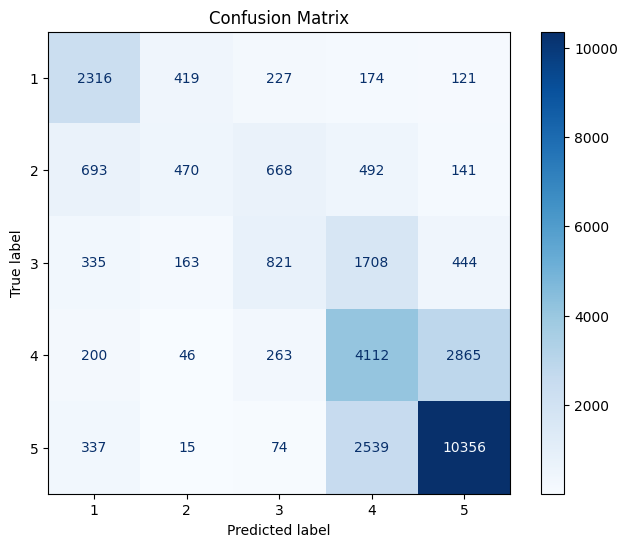

✅ Macierz pomyłek zapisana do confusion_matrix.png
✅ Predykcje zapisane do predictions.csv


In [8]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import ast
import joblib
import os

# 📂 Ścieżki do plików danych (lepiej: względne ścieżki)
DATA_FOLDER = "../data/80_20"

TRAIN_TEXTS_PATH = os.path.join(DATA_FOLDER, "train_texts_bow.csv")
TRAIN_LABELS_PATH = os.path.join(DATA_FOLDER, "train_labels.csv")
TEST_TEXTS_PATH = os.path.join(DATA_FOLDER, "test_texts_bow.csv")
TEST_LABELS_PATH = os.path.join(DATA_FOLDER, "test_labels.csv")

# 📂 Ścieżki do plików wynikowych
MODEL_PATH = 'naive_bayes_model.joblib'
REPORT_PATH = 'model_report.txt'
CONFUSION_MATRIX_PATH = 'confusion_matrix.png'
PREDICTIONS_PATH = 'predictions.csv'

# 🧩 Funkcja konwertująca tekstowy BoW na sparse matrix
def parse_bow(text_column, num_features=None):
    row_indices = []
    col_indices = []
    data_values = []

    for row_idx, text in enumerate(text_column):
        bow_dict = ast.literal_eval(text)
        for word_idx, count in bow_dict.items():
            row_indices.append(row_idx)
            col_indices.append(word_idx)
            data_values.append(count)

    if not col_indices:
        num_cols = num_features if num_features is not None else 0
        return csr_matrix((len(text_column), num_cols))

    max_col = max(col_indices) + 1
    num_cols = num_features if num_features is not None else max_col
    matrix = csr_matrix((data_values, (row_indices, col_indices)), shape=(len(text_column), num_cols))
    return matrix

# 📖 Wczytaj dane
train_texts = pd.read_csv(TRAIN_TEXTS_PATH)
train_labels = pd.read_csv(TRAIN_LABELS_PATH)
test_texts = pd.read_csv(TEST_TEXTS_PATH)
test_labels = pd.read_csv(TEST_LABELS_PATH)

# ✅ Synchronizacja indeksów
valid_indices_train = train_texts['index']
train_labels = train_labels[train_labels['index'].isin(valid_indices_train)].reset_index(drop=True)

valid_indices_test = test_texts['index']
test_labels = test_labels[test_labels['index'].isin(valid_indices_test)].reset_index(drop=True)

# 🧩 Parsowanie BoW
print("🔄 Parsowanie BoW...")
X_train = parse_bow(train_texts['text'])
num_features = X_train.shape[1]
X_test = parse_bow(test_texts['text'], num_features=num_features)

print(f"✅ Wymiary danych:")
print(f"- X_train shape: {X_train.shape}")
print(f"- X_test shape: {X_test.shape}")

# 🎯 Przygotowanie etykiet
y_train = train_labels['stars']
y_test = test_labels['stars']

# 🤖 Trening modelu
if os.path.exists(MODEL_PATH):
    print("📦 Wczytywanie istniejącego modelu...")
    model = joblib.load(MODEL_PATH)
else:
    print("🚀 Trenowanie nowego modelu Naive Bayes...")
    model = MultinomialNB()
    model.fit(X_train, y_train)
    joblib.dump(model, MODEL_PATH)
    print(f"✅ Model zapisany do {MODEL_PATH}")

# 🔮 Predykcja na zbiorze testowym
print("🔮 Generowanie predykcji...")
y_pred = model.predict(X_test)

# 🧩 Ewaluacja modelu
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("✅ Ewaluacja modelu zakończona!")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", class_report)
print("\nConfusion Matrix:\n", conf_matrix)

# 💾 Zapis raportu do pliku
with open(REPORT_PATH, 'w') as f:
    f.write(f"Accuracy: {accuracy}\n\n")
    f.write("Classification Report:\n")
    f.write(class_report)
    f.write("\nConfusion Matrix:\n")
    f.write(np.array2string(conf_matrix))

print(f"✅ Raport zapisany do {REPORT_PATH}")

# 📊 Wizualizacja macierzy pomyłek
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d', ax=ax)
plt.title("Confusion Matrix")
plt.savefig(CONFUSION_MATRIX_PATH)
plt.show()
print(f"✅ Macierz pomyłek zapisana do {CONFUSION_MATRIX_PATH}")

# 💾 Zapis predykcji do pliku CSV
predictions_df = pd.DataFrame({
    'index': test_texts['index'],
    'true_label': y_test,
    'predicted_label': y_pred
})
predictions_df.to_csv(PREDICTIONS_PATH, index=False)
print(f"✅ Predykcje zapisane do {PREDICTIONS_PATH}")
